# Problem Set 3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

%matplotlib inline

In [2]:
dataDir = "./data/"

# Question 1




For this problem we have:

$$
z^{[1](i)} = w^{[1]}x^{(i)} + b^{[1]}
$$

$$
h^{(i)} = \sigma(z^{[1](i)} )
$$

$$
z^{[2](i)} = w^{[2]}h^{(i)} + b^{[2]}
$$

$$
o^{(i)} = \sigma(z^{[2](i)})
$$

## Part A

$$
\ell = \frac{1}{m}\sum_{i=1}^m (o^{(i)}-y^{(i)})^2
$$

$$
\frac{\partial \ell}{\partial w^{[1]}_{1,2}} = \frac{\partial \ell}{\partial o}\frac{\partial o}{\partial z^{[2]}}\frac{\partial z^{[2]}}{\partial h}\frac{\partial h}{\partial z^{[1]}}\frac{\partial z^{[1]}}{\partial w^{[1]}_{1,2}}
$$

It is possible to calculate the gradient by directly plugging in and solving as shown below.

$$
o^{(i)} = \sigma(z^{[2](i)}) 
\\
= \sigma(w^{[2]}_1h^{(i)}_1 + w^{[2]}_2h^{(i)}_2 + w^{[2]}_3h^{(i)}_3 + b^{[2]})
\\
= \sigma(w^{[2]}_1h^{(i)}_1 + w^{[2]}_2\sigma(z^{[2](i)}_2) + w^{[2]}_3h^{(i)}_3 + b^{[2]})
\\
= \sigma(w^{[2]}_1h^{(i)}_1 + w^{[2]}_2\sigma(w^{[1]}_{1,2}x^{(i)}_1 + w^{[1]}_{2,2}x^{(i)}_2 + b^{[1]}_2) + w^{[2]}_3h^{(i)}_3 + b^{[2]})
$$

$$
\frac{\partial o^{(i)}}{\partial w^{[1]}_{1,2}} = \frac{\partial}{\partial w^{[1]}_{1,2}} \left(\sigma(w^{[2]}_1h^{(i)}_1 + w^{[2]}_2\sigma(w^{[1]}_{1,2}x^{(i)}_1 + w^{[1]}_{2,2}x^{(i)}_2 + b^{[1]}_2) + w^{[2]}_3h^{(i)}_3 + b^{[2]})\right)
$$

$$
=\sigma'\left(w^{[2]}_1h^{(i)}_1 + w^{[2]}_2\sigma(w^{[1]}_{1,2}x^{(i)}_1 + w^{[1]}_{2,2}x^{(i)}_2 + b^{[1]}_2) + w^{[2]}_3h^{(i)}_3 + b^{[2]})\right) \cdot w^{[2]}_2 \cdot \sigma'(w^{[1]}_{1,2}x^{(i)}_1 + w^{[1]}_{2,2}x^{(i)}_2 + b^{[1]}_2) \cdot x^{(i)}_1
$$

This can be simplified into

$$
\frac{\partial o^{(i)}}{\partial w^{[1]}_{1,2}} = \sigma'(w^{[2]}h^{(i)} + b^{[2]}) \cdot w^{[2]}_2 \cdot \sigma'(z^{[1](i)}_2) \cdot x^{(i)}_1
$$

Therefore we get

$$
\frac{\partial \ell}{\partial w^{[1]}_{1,2}} 
= \frac{\partial \ell}{\partial o}\frac{\partial o}{\partial w^{[1]}_{1,2}} 
= \frac{2}{m} \sum_{i=1}^m \left((o^{(i)} - y^{(i)}) \sigma'(w^{[2]}h^{(i)} + b^{[2]}) \cdot w^{[2]}_2 \cdot \sigma'(z^{[1](i)}_2) \cdot x^{(i)}_1\right)
$$

Note: $\sigma'(y) = \sigma(y)(1-\sigma(y))$ but using $\sigma'(y)$ so the above expresion can be reduced to

$$
\frac{2}{m} \sum_{i=1}^m \left((o^{(i)} - y^{(i)}) \sigma(w^{[2]}h^{(i)} + b^{[2]})(1-\sigma(w^{[2]}h^{(i)} + b^{[2]})) \cdot w^{[2]}_2 \cdot \sigma(z^{[1](i)}_2)(1-\sigma(z^{[1](i)}_2)) \cdot x^{(i)}_1\right)
\\
= \frac{2}{m} \sum_{i=1}^m \left((o^{(i)} - y^{(i)}) o^{(i)}(1-o^{(i)}) \cdot w^{[2]}_2 \cdot h^{(i)}_2 (1-h^{(i)}_2) \cdot x^{(i)}_1\right)
$$

Your should also look at page 17 of the class deep learning notes for the backpropogation algorithm used there.

## Part B

It appears that you could acheive perfect accuracy if $\hat{y} = 1$ when $x_1 < 0.5$, $x_2 < 0.5$, or $x_1+x_2 < 4$ and $0$ when none of these conditions are met.

* $x_1 < 0.5$

$h_1 = f(0.5 - x_1)$

$w^{[1]}_{0,1} = 0.5, w^{[1]}_{1,1} = -1, w^{[1]}_{0,1} = 0$

* $x_2 < 0.5$

$h_2 = f(0.5 - x_2)$

$w^{[1]}_{0,2} = 0.5, w^{[1]}_{1,2} = 0, w^{[1]}_{2,2} = -1$

* $x_1+x_2 < 4$

$h_3 = f(4-x_1-x_2)$

$w^{[1]}_{0,3} = 4, w^{[1]}_{1,2} = -1, w^{[1]}_{2,2} = -1$

* output layer

$o = f(-0.5 + h_1 + h_2 + h_3)$

$w^{[2]}_{0} = -0.5, w^{[2]}_{1} = 1, w^{[2]}_{2} = 1, w^{[2]}_{3} = 1$


The $-0.5$ is because $f(0) = 1$. If $f(0) = 0$ then the $-0.5$(a small negative number) would not be needed.

## Part C

This is not possible as the data is not linearlly seperable.

# Question 2

$$
\ell(\theta) = \log\left(\prod_{i=1}^{m} p(x^{(i)}; \theta) p(\theta)\right) = \log\prod_{i=1}^{m} \sum_{z^{(i)}} p(x^{(i)}, z^{(i)}; \theta) + \log p(\theta)
$$

$$
= \sum_{i=1}^{m} \log \sum_{z^{(i)}}Q_i(z^{(i)})\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})} + \log p(\theta)
$$

$$
= \sum_{i=1}^{m} \log E_{z^{(i)}\sim Q_i}\left(\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(x^{(i)})}\right) + \log p(\theta)
$$

$$
\ge \sum_{i=1}^{m} E_{z^{(i)}\sim Q_i} \log \left(\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(x^{(i)})}\right) + \log p(\theta)
$$

$$
= \sum_{i=1}^{m} ELBO(x^{(i)}, Q_i, \theta) + \log p(\theta)
$$

if

$$
Q_i(z^{(i)}) = p(z^{(i)} \vert x^{(i)}; \theta)
$$

then

$$
\log\left(\prod_{i=1}^{m} p(x^{(i)}; \theta) p(\theta)\right) = \sum_{i=1}^{m} ELBO(x^{(i)}, Q_i, \theta) + \log p(\theta)
$$

-----

* E step

$$
Q_{i,j}(z^{(i)}) = p(z^{(i)} = j \vert x^{(i)};\theta) = \frac{p(z^{(i)} = j \land x^{(i)}; \theta)}{\sum_{j=1}^{p} p(z^{(i)} = j \land x^{(i)}; \theta)}
$$

* M step

$$
\theta := \arg \max_{\theta} \sum_{i=1}^{m} ELBO(x^{(i)}, Q_i, \theta) + \log p(\theta)
$$

* Proof of convergence

It is sufficient to show $\ell(\theta^{(t+1)}) \ge \ell(\theta^{(t)})$ as there is an upper bound M on any likelihood.

$$
\ell(\theta^{(t+1)}) \ge \sum_{i=1}^{m} ELBO(x^{(i)}, Q_i^{(t)}, \theta^{(t+1)}) + \log p(\theta^{(t+1)})
$$

(By definition of ELBO)

$$
\ge \sum_{i=1}^{m} ELBO(x^{(i)}, Q_i^{(t)}, \theta^{(t)}) + \log p(\theta^{(t)})
$$

(M step, $\theta^{(t+1)}$ is maximized with $Q_i^{(t)}$)

$$
=\ell(\theta^{(t)})
$$

(due to how we constructed $Q_i^{(t)}$)

Note: a similar version of this proof can be found in [Lecture 17](https://www.youtube.com/watch?v=pA-bo8_HNy4&list=PLoROMvodv4rNH7qL6-efu_q2_bPuy0adh&index=17) around min 25 as well as in lecture notes #8 page 7.

# Question 3

FA around 1:25

## Part A

### Section I

$$
y^{(pr)} \sim N(\mu_p, \sigma^2_p)
\\
z^{(pr)} \sim N(\nu_r, \tau^2_r)
\\
x^{(pr)}\vert y^{(pr)}, z^{(pr)} \sim N(y^{(pr)}+z^{(pr)}, \sigma^2)
$$

If $\epsilon^{(pr)} \sim N(0, \sigma^2)$ then we can say

$$
x^{(pr)} = y^{(pr)} + z^{(pr)} + \epsilon^{(pr)}
$$

The multivariate Gaussian becomes

$$
\begin{bmatrix}
y^{(pr)}\\
z^{(pr)}\\
x^{(pr)}
\end{bmatrix}
\sim
N\left(
\begin{bmatrix}
\mu_p\\
\nu_r\\
\mu_p + \nu_r
\end{bmatrix}
,
\begin{bmatrix}
\sigma_p^2 & 0 & \sigma_p^2\\
0 & \tau_r^2 & \tau_r^2\\
\sigma_p^2 & \tau_r^2 & \sigma_p^2 + \tau_r^2 + \sigma^2
\end{bmatrix}
\right)
$$

Parameters: $\mu_p,\nu_r,\sigma_p^2,\tau_r^2$

Observed Variables: $x^{(pr)}$

Latent Variables: $y^{(pr)},z^{(pr)}$

### Section II

Equations for conditonal multivariate normal distributions are given in lecture notes #9, page 4, Eqs 1 and 2.

$$
y^{(pr)}, z^{(pr)} \vert x^{(pr)} \sim N\left(
\mu_{E}, \Sigma_{E}
\right)
$$

where


$$
\mu_E = 
\left[
\begin{bmatrix}
\mu_p\\
\nu_r\\
\end{bmatrix}
+ 
\begin{bmatrix}
\sigma_p^2\\
\tau_r^2\\
\end{bmatrix}
\cdot
\frac{1}{\sigma_p^2 + \tau_r^2 + \sigma^2}
\cdot
(x^{(pr)} - \mu_p - \nu_r)
\right]
$$

$$
\Sigma_E = 
\begin{bmatrix}
\sigma_p^2 & 0 \\
0 & \tau_r^2 \\
\end{bmatrix}
-
\begin{bmatrix}
\sigma_p^2\\
\tau_r^2\\
\end{bmatrix}
\cdot
\frac{1}{\sigma_p^2 + \tau_r^2 + \sigma^2}
\cdot
\begin{bmatrix}
\sigma_p^2\\
\tau_r^2\\
\end{bmatrix}^T
$$

---

$$
Q_{pr}(y^{(pr)}, z^{(pr)}) = p(y^{(pr)}, z^{(pr)} \vert x^{(pr)})
$$

$$
= \frac{1}{(2\pi)\vert \Sigma_E \vert ^{\frac{1}{2}}} \exp \left(
\frac{-1}{2}
\left(
\begin{bmatrix}
y^{(pr)}\\
z^{(pr)}\\
\end{bmatrix}
-\mu_E 
\right)
\Sigma_E^{-1}
\left(
\begin{bmatrix}
y^{(pr)}\\
z^{(pr)}\\
\end{bmatrix}
-\mu_E 
\right)^T
\right)
$$

## Part B

$$
\mu_p,\nu_r,\sigma_p^2,\tau_r^2 := \arg\max_{\mu_p,\nu_r,\sigma_p^2,\tau_r^2} \sum_{\forall pr} ELBO(x^{(pr)}, Q_pr, \mu_p,\nu_r,\sigma_p^2,\tau_r^2)
$$

$$
= \arg\max_{\mu_p,\nu_r,\sigma_p^2,\tau_r^2} \sum_{\forall pr} \int_{y^{(pr)},z^{(pr)}} Q_{pr}(y^{(pr)},z^{(pr)})\log \frac{p(y^{(pr)},z^{(pr)},x^{(pr)};\mu_p,\nu_r,\sigma_p^2,\tau_r^2)}{Q_{pr}(y^{(pr)},z^{(pr)})} dy^{(pr)} dz^{(pr)}
$$

$$
= \arg\max_{\mu_p,\nu_r,\sigma_p^2,\tau_r^2} \sum_{\forall pr} E_{Q_{pr}}
\left(
\log \frac{p(y^{(pr)},z^{(pr)},x^{(pr)};\mu_p,\nu_r,\sigma_p^2,\tau_r^2)}{Q_{pr}(y^{(pr)},z^{(pr)})}
\right)
$$

$$
= \arg\max_{\mu_p,\nu_r,\sigma_p^2,\tau_r^2} \sum_{\forall pr} E_{Q_{pr}}
\left(
\log p(y^{(pr)},z^{(pr)},x^{(pr)};\mu_p,\nu_r,\sigma_p^2,\tau_r^2) - \log Q_{pr}(y^{(pr)},z^{(pr)})
\right)
$$

$$
= \arg\max_{\mu_p,\nu_r,\sigma_p^2,\tau_r^2} \sum_{\forall pr} E_{Q_{pr}}
\left(
\log p(y^{(pr)},z^{(pr)},x^{(pr)};\mu_p,\nu_r,\sigma_p^2,\tau_r^2)
\right)
$$

$$
= \arg\max_{\mu_p,\nu_r,\sigma_p^2,\tau_r^2} \sum_{\forall pr} E_{Q_{pr}}
\left(
\log \frac{1}{(2\pi)^{\frac{3}{2}} \vert \Sigma_{yzx} \vert^{\frac{1}{2}}}
\exp \left(
\frac{-1}{2}
\begin{bmatrix}
y^{(pr)} - \mu_p\\
z^{(pr)} - \nu_r\\
x^{(pr)} - \mu_p - \nu_r
\end{bmatrix}
\Sigma_{yzx}^{-1}
\begin{bmatrix}
y^{(pr)} - \mu_p\\
z^{(pr)} - \nu_r\\
x^{(pr)} - \mu_p - \nu_r
\end{bmatrix}^T
\right)
\right)
$$

$$
= \arg\max_{\mu_p,\nu_r,\sigma_p^2,\tau_r^2} \sum_{\forall pr} E_{Q_{pr}}
\left(
\frac{-1}{2} \log \vert \Sigma_{yzx} \vert
- \frac{1}{2}
\begin{bmatrix}
y^{(pr)} - \mu_p\\
z^{(pr)} - \nu_r\\
x^{(pr)} - \mu_p - \nu_r
\end{bmatrix}
\Sigma_{yzx}^{-1}
\begin{bmatrix}
y^{(pr)} - \mu_p\\
z^{(pr)} - \nu_r\\
x^{(pr)} - \mu_p - \nu_r
\end{bmatrix}^T
\right)
$$

$$
= \arg\max_{\mu_p,\nu_r,\sigma_p^2,\tau_r^2} \sum_{\forall pr}\frac{-1}{2} \log \vert \Sigma_{yzx} \vert
- \frac{1}{2} E_{Q_{pr}}
\left(
\begin{bmatrix}
y^{(pr)} - \mu_p\\
z^{(pr)} - \nu_r\\
x^{(pr)} - \mu_p - \nu_r
\end{bmatrix}
\Sigma_{yzx}^{-1}
\begin{bmatrix}
y^{(pr)} - \mu_p\\
z^{(pr)} - \nu_r\\
x^{(pr)} - \mu_p - \nu_r
\end{bmatrix}^T
\right)
$$

Where 

$$
\Sigma_{yzx} = 
\begin{bmatrix}
\sigma_p^2 & 0 & \sigma_p^2\\
0 & \tau_r^2 & \tau_r^2\\
\sigma_p^2 & \tau_r^2 & \sigma_p^2 + \tau_r^2 + \sigma^2
\end{bmatrix}
$$

# Question 4

## Part A

* $\forall P,Q$ $KL(P \Vert Q) \ge 0$

$$
KL(P \Vert Q) = \sum_{x} P(x) \log \frac{P(x)}{Q(x)}
$$

$$
= E_{P(x)} \left( \log \frac{P(x)}{Q(x)} \right)
$$

$$
= -E_{P(x)} \left( \log \frac{Q(x)}{P(x)} \right)
$$

$$
\ge - \log E\left(\frac{Q(x)}{P(x)}\right)
$$

$$
= -\log \sum_{x} P(x) \frac{Q(x)}{P(x)}
$$

$$
= -\log \sum_{x} Q(x)
$$

$$
= 0
$$

Thus we have shown $KL(P \Vert Q) \ge 0$ which is what we wanted to show.

* $KL(P \Vert Q) = 0$ iff $P = Q$

$\implies$

Assume $KL(P \Vert Q) = 0$. Then

$$
\sum_{x} P(x) \log \frac{P(x)}{Q(x)} = 0
$$

Using the results above we get

$$
\sum_{x} P(x) \log \frac{P(x)}{Q(x)} = E_{P(x)}\left(\log \frac{P(x)}{Q(x)}\right)
$$

$$
\ge - \log E_{P(x)}\left(\frac{Q(x)}{P(x)}\right)
$$

$$
= - \log \sum_{x} P(x) \frac{Q(x)}{P(x)} = 0
$$

Since $-\log$ is strictly convex p must equal q for Jensens equality to hold. This is known as [Gibbs inequality](http://www.cs.cmu.edu/~venkatg/teaching/ITCS-spr2013/notes/lect-jan22.pdf) (3.1)

$\impliedby$

Assume $P = Q$. Then $\frac{P(x)}{Q(x)} = 1$ so we get

$$
KL(P \Vert Q) = \sum_{x} P(x) \log \frac{P(x)}{Q(x)} = \sum_{x} P(x) \log 1 = 0
$$

## Part B

$$
KL(P(X,Y) \Vert Q(X,Y)) = \sum_{x,y} P(x,y) \log \frac{P(x,y)}{Q(x,y)}
$$

$$
=\sum_{x}\sum_{y} P(x)P(y\vert x) \log \frac{P(x)P(y\vert x)}{Q(x)Q(y\vert x)}
$$

$$
=\sum_{x} P(x) \sum_{y} P(y\vert x) \left(\log \frac{P(x)}{Q(x)} + \log \frac{P(y\vert x)}{Q(y\vert x)}\right)
$$

$$
= \sum_{x} P(x) \left(\sum_{y} P(y\vert x) \log \frac{P(x)}{Q(x)}\right) + \sum_{x} P(x) \left(\sum_{y} P(y\vert x) \log \frac{P(y\vert x)}{Q(y\vert x)}\right)
$$

$$
= \sum_{x} P(x) \log \frac{P(x)}{Q(x)} \left(\sum_{y} P(y \vert x)\right) + KL(P(Y \vert X) \Vert Q(Y \vert X))
$$

$$
= \sum_{x} P(x) \log \frac{P(x)}{Q(x)} \cdot 1 + KL(P(Y \vert X) \Vert Q(Y \vert X))
$$

$$
= KL(P(X) \Vert Q(X)) + KL(P(Y \vert X) \Vert Q(Y \vert X))
$$

Thus $KL(P(X,Y) \Vert Q(X,Y)) = KL(P(X) \Vert Q(X)) + KL(P(Y \vert X) \Vert Q(Y \vert X))$, which is what we wanted to show. 

## Part C

$$
\hat{P}(x) = \#(x^{(i)} = x)
$$

$$
\arg\min_\theta KL(\hat{P}\Vert P_\theta) = \arg\min_\theta \sum_{x} \hat{P}(x) \log \frac{\hat{P}(x)}{P_\theta(x)}
$$

$$
= \arg\min_\theta \sum_x \hat{P}(x)\log \hat{P}(x) - \hat{P}(x)\log P_\theta (x)
$$

$$
= \arg\min_\theta \sum_x \hat{P}(x)\log \hat{P}(x) - \hat{P}(x)\log P_\theta (x)
$$

$$
= \arg\min_\theta -\sum_x  \hat{P}(x)\log P_\theta (x)
$$

$$
= \arg\max_\theta \sum_x  \hat{P}(x)\log P_\theta (x)
$$

$$
= \arg\max_\theta \sum_x \frac{1}{m} \sum_{i=1}^m I(x^{(i)} = x) \log P_\theta (x)
$$

$$
= \arg\max_\theta \frac{1}{m} \sum_{i=1}^m \sum_x I(x^{(i)} = x) \log P_\theta (x)
$$

$$
= \arg\max_\theta \frac{1}{m} \sum_{i=1}^m \log P_\theta (x)
$$

$$
= \arg\max_\theta \sum_{i=1}^m \log P_\theta (x)
$$

Thus we have shown that finding the maximum likelihood estimate for the parameter $\theta$ is equivalent to finding $P_\theta$ with minimal KL divergence from $\hat{P}$.

# Question 5

In [3]:
from matplotlib.image import imread

In [4]:
largeImageName = "mandrill-large.tiff"
smallImageName = "mandrill-small.tiff"

## Part A



Text(0.5, 1.0, 'mandrill image')

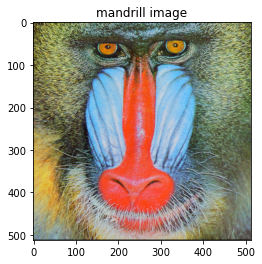

In [5]:
largeImage = imread(dataDir+largeImageName)
plt.imshow(largeImage)
plt.title("mandrill image")

Text(0.5, 1.0, 'mandrill image - small')

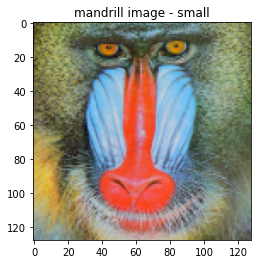

In [6]:
smallImage = imread(dataDir+smallImageName)
plt.imshow(smallImage)
plt.title("mandrill image - small")

The images are shown above

## Part B

The code below was to impliment a K means algorithm. Something is wrong and I redid the code. I still think the results are still cool.

In [7]:
clusters = 16
minIter = 30
maxIter = 1000

In [8]:
def cost_centroids(X, centroids):
    kClusters = len(centroids)
    #J_i = np.zeros(kClusters)
    distMat = np.zeros((X.shape[0], kClusters))
    
    for idx, centroid in enumerate(centroids):
        diff = X - centroid
        distMat[:,idx] = (diff**2).sum(axis = 1) # row sum
    # the argmin will assign each data point to a centroid
    assignments = distMat.argmin(axis = 1)
    #for jdx in range(kClusters):
    J_i = [np.linalg.norm(X[assignments == jdx]) for jdx in range(kClusters)]
    
    return sum(J_i)

def find_centroids(X, kClusters, minIter, maxIter):
    # init centroids to random points in the data
    initPoints = random.sample(range(X.shape[0]), kClusters)
    centroids = X[initPoints,:]
    delta = 1.0
    Iter = 0
    while Iter <= maxIter and delta != 0 and (delta > 1e-6 or Iter <= minIter):
        centroid_hold = centroids.copy()
        #init distance matrix which will be the distance between each data point and centroid
        distMat = np.zeros((X.shape[0], kClusters))
        for idx, centroid in enumerate(centroids):
            diff = X - centroid
            distMat[:,idx] = (diff**2).sum(axis = 1) # row sum
        # the argmin will assign each data point to a centroid
        assignments = distMat.argmin(axis = 1)
        # update the centroids
        for jdx in range(kClusters):
            centroids[jdx] = np.mean(X[assignments == jdx], axis = 0)
        # calculate the change in position
        delta = np.linalg.norm(centroids - centroid_hold)
        
        Iter += 1
        # if Iter  < minIter:
        #     if delta == 0:
        #         break
        # else:
        #     if delta < 1e-6:
        #         break
        #     if Iter >= maxIter:
        #         break
    
    return centroids

def kMeans(image, kClusters = clusters, minIter = minIter, maxIter = maxIter, seed = 1234567, attempts = 5):
    random.seed(seed)
    # reshape data so each row are the rgb values
    X = image.reshape(-1, 3)
    X = X.astype(np.float32)
    cost = np.inf
    
    for i in range(attempts):
        centroids = find_centroids(X, kClusters, minIter, maxIter)
        newCost = cost_centroids(X, centroids)
        if newCost < cost:
            cost = newCost
            bestCentroid = centroids.copy()
            #print(f"attempt: {i}, {cost = :.0f}")
    
    return bestCentroid



In [9]:
centroids = kMeans(smallImage, attempts = 50)
print("the centroids are:")
centroids.round()

the centroids are:


array([[210., 143.,  92.],
       [123., 138., 125.],
       [236.,  81.,  56.],
       [ 75.,  77.,  58.],
       [ 97., 139., 177.],
       [182., 170., 165.],
       [175., 112.,  50.],
       [158., 193., 221.],
       [113., 110.,  71.],
       [137., 137.,  87.],
       [117., 183., 227.],
       [144., 159., 149.],
       [ 52.,  50.,  42.],
       [163., 162., 113.],
       [ 98., 116., 110.],
       [ 85.,  97.,  82.]], dtype=float32)

## Part C

In [10]:
def find_best_centroid(image, centroids):
    nrow = image.shape[0]
    ncol = image.shape[1]
    kClusters = len(centroids)
    best_centroid = np.zeros((nrow, ncol))
    for idx in range(nrow):
        for jdx in range(ncol):
            pixelDist = ((image[idx,jdx,:]-centroids)**2).sum(axis = 1)
            best_centroid[idx,jdx] = pixelDist.argmin()
    return best_centroid

def construct_compressed_image(centroidMat, centroids):
    nrow = centroidMat.shape[0]
    ncol = centroidMat.shape[1]
    image = np.zeros((nrow, ncol, 3))
    for idx in range(nrow):
        for jdx in range(ncol):
            image[idx,jdx,:] = centroids[int(centroidMat[idx,jdx])]
    return image

In [11]:
compressedImage = find_best_centroid(largeImage, centroids)
reconstructImage = construct_compressed_image(compressedImage, centroids)

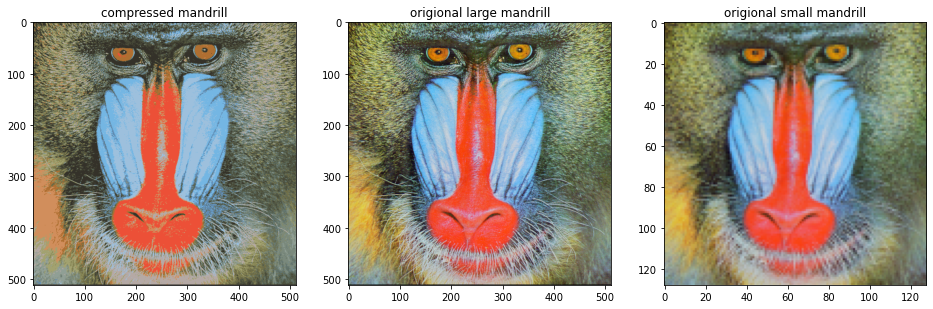

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(16, 16))
ax = axes.ravel()

ax[0].imshow(reconstructImage/255)
ax[0].set_title('compressed mandrill');
ax[1].imshow(largeImage)
ax[1].set_title('origional large mandrill');
ax[2].imshow(smallImage)
ax[2].set_title('origional small mandrill');


The 3 mandrill images are shown above. The compressed image still retains most most of the origional data from the large mandrill. 

# Part D

The images are represented with data that is int8. The centroids can be represented with int4. Additionally 3 int8's represent each pixel. Since each pixel has gone from being represented with 24 bits to 4 bits we get that the data is reduced by a factor of 6.